#### What is Pipeline in ML?

In machine learning, a **pipeline** is an automated workflow that connects all the steps of the machine learning lifecycle—from gathering raw data to making real-time predictions.

Think of it like a factory assembly line: raw materials (data) enter at one end, pass through various stations for cleaning and processing, and emerge at the other end as a finished product (a working prediction model).



---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5*X**2 + 1.5*X + 2 + np.random.randn(100, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('The Data get splitted in 25% Test Data and 75% Training Data:')
print(f'X Train: {X_train.shape}')
print(f'X Test: {X_test.shape}')
print(f'y Train: {y_train.shape}')
print(f'y Test: {y_test.shape}')

The Data get splitted in 25% Test Data and 75% Training Data:
X Train: (75, 1)
X Test: (25, 1)
y Train: (75, 1)
y Test: (25, 1)


In [12]:
def poly_regression(degree):
    # Create new data
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)

    # Transform the data using PolynomialFeatures
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)

    # Create a linear regression model to apply for transformed data
    linear_reg = LinearRegression()

    # Use "Pipeline" function to perform Data transformation and Linear Regression together
    poly_regression = Pipeline([
        ('poly_features', poly_features),
        ('linear_reg', linear_reg)
    ])
    
    # use "poly_regression" to transform and model data simultaneously
    poly_regression.fit(X_train, y_train)
    y_pred_new = poly_regression.predict(X_new)

    # Plot prediction line so we can visualize it for various degrees
    plt.plot(X_new, y_pred_new, 'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, 'b.', label="Training data", linewidth=3)
    plt.plot(X_test, y_test, 'g.', label="Test data", linewidth=3)
    plt.legend(loc='upper left')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.axis([-4, 4, 0, 10])
    plt.show()

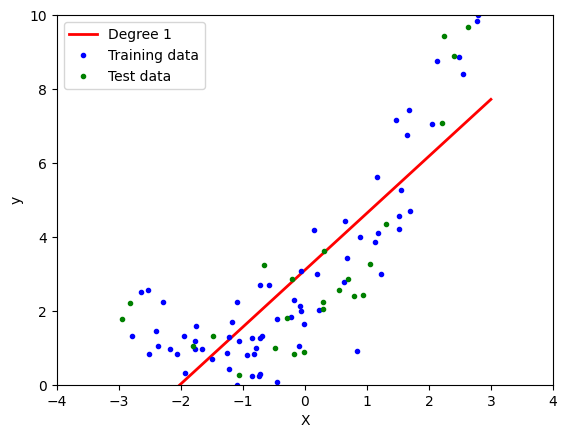

In [14]:
poly_regression(1)

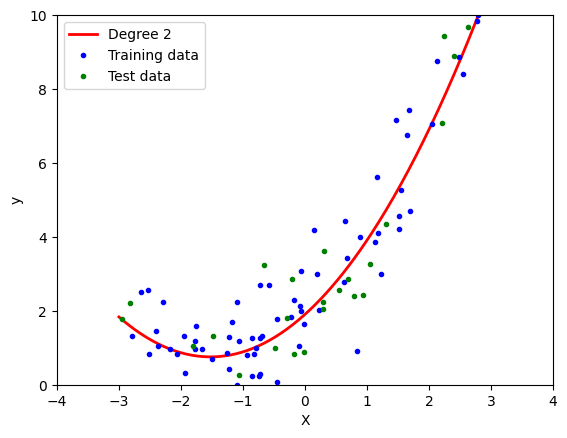

In [15]:
poly_regression(2)

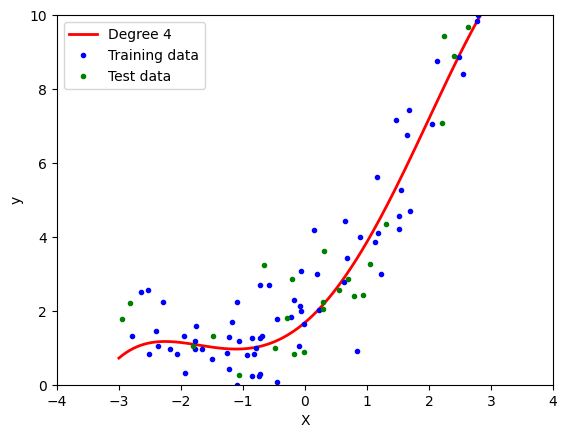

In [16]:
poly_regression(4)

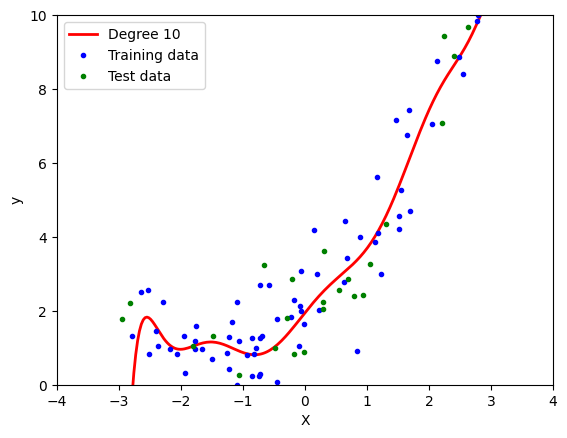

In [18]:
poly_regression(10)

#### The Overfitting Trap
When the degree is too large, the model becomes "too flexible." Instead of learning the general trend of the data, it begins to memorize the noise and random fluctuations in the training set.

**Low Degree (Underfitting)**: The model is too simple (like a straight line) and misses the trend. `poly_regression(1)`

**Optimal Degree**: The model captures the underlying curve smoothly. `poly_regression(3)`, `poly_regression(4)`

**High Degree (Overfitting)**: The model forces the curve to pass through every single data point, resulting in wild oscillations between points. `poly_regression(10)`

---

##### 1. Key Components of a Pipeline
A standard ML pipeline typically consists of several modular stages. Because it is modular, you can update one part (like changing the model) without having to rewrite the entire process.

* **Data Ingestion:** Collecting raw data from sources like databases, APIs, or CSV files.
* **Data Preprocessing:** Cleaning the "messy" data—handling missing values, removing duplicates, and normalizing scales (e.g., ensuring all numbers are between 0 and 1).
* **Feature Engineering:** Selecting or creating the most important variables that will help the model learn (e.g., converting a "Date of Birth" into an "Age" column).
* **Model Training:** Feeding the prepared data into an algorithm (like a Random Forest or Neural Network) so it can learn patterns.
* **Evaluation:** Testing the model against a "hold-out" dataset to see how accurate it is on data it hasn't seen before.
* **Deployment:** Moving the final model into a production environment where it can start serving real users.

---

##### 2. Why Use a Pipeline?
In the early days of AI, researchers often performed these steps manually in scripts. Pipelines were created to solve several "real-world" problems:

* **Automation:** Once the pipeline is built, it can run on its own. If new data comes in tomorrow, the pipeline automatically cleans it and updates the model.
* **Reproducibility:** It ensures that every time you run the process, it happens in the exact same way. This prevents "it works on my machine" bugs.
* **Scalability:** Pipelines make it possible to manage hundreds of different models at once, which would be impossible to do manually.
* **Prevention of "Data Leakage":** A common mistake in ML is accidentally using information from the "future" (the test set) to train the model. Pipelines strictly separate these stages to prevent this.

---

##### 3. Pipelines vs. Workflows
While often used interchangeably, there is a subtle difference:
* **Workflow:** The high-level plan or "blueprint" of the steps you need to take.
* **Pipeline:** The actual technical implementation and automation of that blueprint using code and tools (like Scikit-Learn Pipelines, Apache Airflow, or Kubeflow).

> **Pro Tip:** In modern industry, managing these pipelines is often referred to as **MLOps** (Machine Learning Operations), which is essentially the "DevOps" of the AI world.